In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('daily+demand+forecasting+orders/Daily_Demand_Forecasting_Orders.csv',delimiter=";")
data

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [3]:
data.isnull().sum()

Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                                 0
dtype: int64

In [4]:
data.describe()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [5]:
# Update values in the 'Value' column based on a condition
condition1 = data.index% 5 == 0  
data.loc[condition1, 'biased'] = data.loc[condition1, 'Target (Total orders)'] * 1.4 

condition2 = data.index% 5 != 0 
data.loc[condition2, 'biased'] = data.loc[condition2, 'Target (Total orders)'] 

data

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),biased
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,755.4078
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,224.6750
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412,129.4120
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120,317.1200
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517,210.5170
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364,290.3096
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043,263.0430
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958,248.9580
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291,344.2910
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428,248.4280


In [6]:
X = data[['Week of the month (first week, second, third, fourth or fifth week','Day of the week (Monday to Friday)','Non-urgent order','Urgent order','Order type A','Order type B','Order type C']]
y = data['Target (Total orders)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## XG Boost

In [7]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost regressor model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.5, max_depth=3, random_state=42)

# Fit the model to the training data
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Forecast demand for future periods

In [8]:
# Predict the target variable on the test data
y_pred = xgbr.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1446.0093661409094


## Bias prediction

In [9]:
X = data[['Week of the month (first week, second, third, fourth or fifth week','Day of the week (Monday to Friday)','Non-urgent order','Urgent order','Order type A','Order type B','Order type C']]
y_bias = data['biased']
X_train, X_test, y_train_bias, y_test_bias = train_test_split(X, y_bias, test_size=0.2, random_state=42)

In [10]:
biased_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.5, max_depth=3, random_state=42)

# Fit the model to the training data
biased_model.fit(X_train, y_train_bias - X_train.mean(axis=1))  # Predict the bias based on features

bias_predictions = biased_model.predict(X_test)
y_pred_bias = xgbr.predict(X_test) + bias_predictions  # Adjust the predictions by adding the predicted bias

# Evaluate the model
mse_bias = mean_squared_error(y_test_bias, y_pred_bias)
print("Mean Squared Error:", mse_bias)

Mean Squared Error: 53349.3003540108


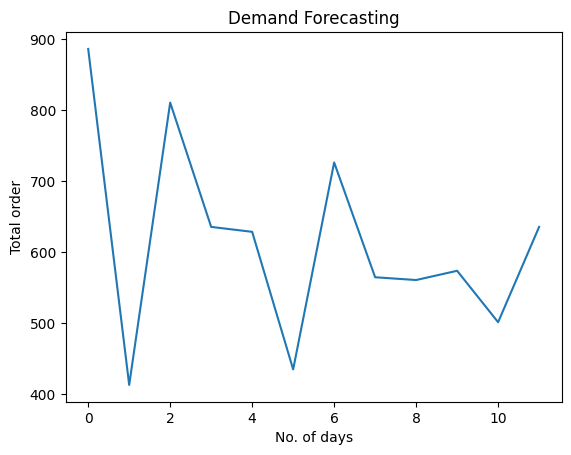

In [11]:
plt.title('Demand Forecasting')
plt.xlabel('No. of days')
plt.ylabel('Total order')
plt.plot(y_pred_bias)
plt.show()

## Dynamic Inventory Optimization

In [12]:
# Assume a simple inventory management policy: reorder point and order quantity

#Calculate the reorder point using the formula: Reorder Point = Lead Time Demand + Safety Stock
lead_time_demand = (data['Order type A'].sum() + data['Order type B'].sum() + data['Order type C'].sum())/60
safety_stock = (data['Order type A'].max() + data['Order type B'].max() + data['Order type C'].max())/3

reorder_point = lead_time_demand+safety_stock

order_quantity = 1500 # 50% of capacity

# Calculate current inventory level
current_inventory = 3000

# Calculate forecasted demand for each day and adjust inventory accordingly
for i, demand in enumerate(y_pred):
    if current_inventory <= reorder_point:
        # Place order to replenish inventory
        current_inventory += order_quantity
    current_inventory -= demand
    
    # Ensure inventory level doesn't go negative
    current_inventory = max(0, current_inventory)
    
    print(f"Day {i+1}: Forecasted Demand = {demand}, Inventory Level = {current_inventory}")
    if current_inventory<900:
        print("There might be a chance of skyrocketting of orders, please take appropriate measures\n")

Day 1: Forecasted Demand = 493.19256591796875, Inventory Level = 2506.8074340820312
Day 2: Forecasted Demand = 223.9007110595703, Inventory Level = 2282.906723022461
Day 3: Forecasted Demand = 503.1551513671875, Inventory Level = 1779.7515716552734
Day 4: Forecasted Demand = 332.11590576171875, Inventory Level = 1447.6356658935547
Day 5: Forecasted Demand = 345.7744140625, Inventory Level = 1101.8612518310547
Day 6: Forecasted Demand = 236.57972717285156, Inventory Level = 865.2815246582031
There might be a chance of skyrocketting of orders, please take appropriate measures

Day 7: Forecasted Demand = 320.8106689453125, Inventory Level = 544.4708557128906
There might be a chance of skyrocketting of orders, please take appropriate measures

Day 8: Forecasted Demand = 296.1661682128906, Inventory Level = 248.3046875
There might be a chance of skyrocketting of orders, please take appropriate measures

Day 9: Forecasted Demand = 329.2247314453125, Inventory Level = 1419.0799560546875
Day 1

In [13]:
reorder_point

530.1959833333333

In [15]:
# Points to remember to update
# randomly generate bias